In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

#setting to make umbers easier to read
pd.options.display.float_format = '{:20.2f}' . format

pd.set_option('display.max_columns',999)

Data exploration

In [11]:
df = pd.read_excel(r'C:/Users/Amr/Downloads/online_retail.xlsx',sheet_name= 0)
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom


Data Types

In [12]:
df.info()    #cusomer id contain null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [13]:
df.describe() # min Quantity & Min Price are negative values

,Quantity,InvoiceDate,Price,Customer ID
count,525461.00,525461,525461.00,417534.00
mean,10.34,2010-06-28 11:37:36.845017856,4.69,15360.65
min,-9600.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-03-21 12:20:00,1.25,13983.00
50%,3.00,2010-07-06 09:51:00,2.10,15311.00
75%,10.00,2010-10-15 12:45:00,4.21,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,107.42,NaN,146.13,1680.81


In [14]:
df.describe(include='O')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [15]:
df['Invoice'].duplicated()

0         False
1          True
2          True
3          True
4          True
          ...  
525456     True
525457     True
525458     True
525459     True
525460     True
Name: Invoice, Length: 525461, dtype: bool

In [16]:
df[df['Customer ID'].isna()].head(10) #some prices = 0

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [17]:
df[df['Quantity']<0].head(10) #some invoices contain Strings + numbers

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.00,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.00,United Kingdom


In [18]:
df['Invoice'] = df['Invoice'].astype("str")
df[df['Invoice'].str.match("^\\d{6}$")== True]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [19]:
df[df['Invoice'].str.match("^\\d{6}$")== False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.00,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.00,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.00,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.00,United Kingdom


In [20]:
df["Invoice"].str.replace("[0-9]","",regex=True) #convert numbers of invoices to space in order to get a unique list of letters

0          
1          
2          
3          
4          
         ..
525456     
525457     
525458     
525459     
525460     
Name: Invoice, Length: 525461, dtype: object

In [21]:
df["Invoice"].str.replace("[0-9]","",regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [22]:
df[df['Invoice'].str.startswith("A")] #invoices strart with A (Adjust bad debt) will be deleted 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [23]:
df['StockCode'] = df['StockCode'].astype("str")
df[(df['StockCode'].str.match("^\\d{5}$")==False)&(df['StockCode'].str.match("^\\d{5}[a-zA-Z]+$")==False)]['StockCode'].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [24]:
df[df['StockCode'].str.contains("^POST")&(df['Quantity']>0)] #will be deleted as it is POSTAGE prices

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.00,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.00,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.00,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.00,Germany
1244,489557,POST,POSTAGE,4,2009-12-01 12:52:00,18.00,12490.00,France
...,...,...,...,...,...,...,...,...
522916,537967,POST,POSTAGE,1,2010-12-09 11:31:00,18.00,12494.00,France
522930,537995,POST,POSTAGE,2,2010-12-09 11:39:00,18.00,12712.00,Germany
522974,538003,POST,POSTAGE,8,2010-12-09 12:05:00,18.00,12429.00,Denmark
523064,538008,POST,POSTAGE,5,2010-12-09 12:17:00,18.00,12683.00,France


In [25]:
df[(df['StockCode'] == "D")&(df['Customer ID'].isna()==False)&(df['Quantity']>0)] 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
160443,504700,D,Discount,1,2010-04-15 18:08:00,57.63,17032.00,United Kingdom
212633,509979,D,Discount,1,2010-05-26 14:07:00,101.99,12843.00,United Kingdom
312285,519808,D,Discount,192,2010-08-20 12:50:00,1.00,16422.00,United Kingdom
494226,535657,D,Discount,1,2010-11-28 11:20:00,13.98,14527.00,United Kingdom
501237,536158,D,Discount,1,2010-11-30 11:57:00,32.29,13634.00,United Kingdom


In [26]:
df[df['StockCode'].str.contains("^DCGS0058")] # customer id is null  will be deleted 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2377,489597,DCGS0058,MISO PRETTY GUM,1,2009-12-01 14:28:00,0.83,NaN,United Kingdom
8372,490074,DCGS0058,MISO PRETTY GUM,1,2009-12-03 14:39:00,0.83,NaN,United Kingdom
17264,490745,DCGS0058,MISO PRETTY GUM,1,2009-12-07 18:02:00,0.83,NaN,United Kingdom
30671,491969,DCGS0058,MISO PRETTY GUM,1,2009-12-14 17:57:00,0.83,NaN,United Kingdom
31652,491970,DCGS0058,MISO PRETTY GUM,1,2009-12-14 18:03:00,0.83,NaN,United Kingdom
32045,491971,DCGS0058,MISO PRETTY GUM,2,2009-12-14 18:37:00,0.83,NaN,United Kingdom
34668,492303,DCGS0058,MISO PRETTY GUM,1,2009-12-16 11:57:00,0.83,NaN,United Kingdom
37222,492425,DCGS0058,MISO PRETTY GUM,1,2009-12-16 17:58:00,0.83,NaN,United Kingdom
40878,492782,DCGS0058,MISO PRETTY GUM,1,2009-12-18 17:06:00,0.83,NaN,United Kingdom
41260,492783,DCGS0058,MISO PRETTY GUM,2,2009-12-18 17:15:00,0.83,NaN,United Kingdom


In [27]:
df[df['StockCode'].str.contains("^DCGS0068")] #customer id is null  will be deleted

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2378,489597,DCGS0068,DOGS NIGHT COLLAR,1,2009-12-01 14:28:00,8.65,NaN,United Kingdom
62734,494918,DCGS0068,DOGS NIGHT COLLAR,1,2010-01-19 17:49:00,8.47,NaN,United Kingdom


In [28]:
df[df['StockCode'].str.contains("^DOT")] #customer id is null  will be deleted 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.35,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.39,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524272,538071,DOT,DOTCOM POSTAGE,1,2010-12-09 14:09:00,885.94,NaN,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


In [29]:
df[(df['StockCode'] == "M") &(df['Quantity'] > 0)&(df['Price'] > 0)&(df['Customer ID'].isna()==False)] 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
11310,490300,M,Manual,1,2009-12-04 14:19:00,0.85,12970.00,United Kingdom
11311,490300,M,Manual,1,2009-12-04 14:19:00,0.21,12970.00,United Kingdom
17386,490760,M,Manual,1,2009-12-08 09:49:00,10.00,14295.00,United Kingdom
17887,490881,M,Manual,1,2009-12-08 12:58:00,10.00,16210.00,United Kingdom
19542,490999,M,Manual,1,2009-12-08 17:26:00,15.95,13883.00,United Kingdom
...,...,...,...,...,...,...,...,...
516892,537435,M,Manual,2,2010-12-06 16:58:00,5.95,17920.00,United Kingdom
521074,537800,M,Manual,12,2010-12-08 13:08:00,0.19,12748.00,United Kingdom
521122,537804,M,Manual,12,2010-12-08 13:17:00,2.95,12748.00,United Kingdom
521124,537804,M,Manual,12,2010-12-08 13:17:00,0.19,12748.00,United Kingdom


In [30]:
df[(df['StockCode'].str.contains("^DCGS0004"))&(df['Quantity']>0)] # customer id is null  will be deleted 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
8371,490074,DCGS0004,HAYNES CAMPER SHOULDER BAG,1,2009-12-03 14:39:00,17.35,NaN,United Kingdom
164723,504935,DCGS0004,HAYNES CAMPER SHOULDER BAG,1,2010-04-19 11:19:00,16.98,NaN,United Kingdom
401083,527789,DCGS0004,HAYNES CAMPER SHOULDER BAG,1,2010-10-19 11:10:00,16.98,NaN,United Kingdom


In [31]:
df[df['StockCode'].str.contains("^DCGS0076")] # customer id is null  will be deleted 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
8373,490074,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,1,2009-12-03 14:39:00,16.48,NaN,United Kingdom
16426,490741,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,1,2009-12-07 17:56:00,16.48,NaN,United Kingdom
17265,490745,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,1,2009-12-07 18:02:00,16.48,NaN,United Kingdom
20324,491043,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,1,2009-12-09 09:51:00,16.48,NaN,United Kingdom
30673,491969,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,1,2009-12-14 17:57:00,16.48,NaN,United Kingdom
69630,495574,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,1,2010-01-25 17:36:00,16.13,NaN,United Kingdom
87575,497590,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,1,2010-02-10 17:59:00,16.13,NaN,United Kingdom
118446,500695,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,1,2010-03-09 12:48:00,16.13,NaN,United Kingdom
169935,505510,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,2,2010-04-22 14:33:00,16.13,NaN,United Kingdom
212437,509972,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,1,2010-05-26 13:34:00,16.13,NaN,United Kingdom


In [32]:
df[(df['StockCode'].str.contains("^C2")) & (df['Customer ID'].isna()==False) & (df['Quantity']>0)] 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
9292,490127,C2,CARRIAGE,1,2009-12-03 18:13:00,50.00,14156.00,EIRE
14502,490542,C2,CARRIAGE,1,2009-12-07 09:42:00,50.00,14911.00,EIRE
19541,490998,C2,CARRIAGE,1,2009-12-08 17:24:00,50.00,16253.00,United Kingdom
22803,491160,C2,CARRIAGE,1,2009-12-10 10:29:00,50.00,14911.00,EIRE
32964,492092,C2,CARRIAGE,1,2009-12-15 14:03:00,50.00,14156.00,EIRE
...,...,...,...,...,...,...,...,...
504361,536540,C2,CARRIAGE,1,2010-12-01 14:05:00,50.00,14911.00,EIRE
515057,537368,C2,CARRIAGE,1,2010-12-06 12:40:00,50.00,14911.00,EIRE
515390,537378,C2,CARRIAGE,1,2010-12-06 13:06:00,50.00,14911.00,EIRE
522913,537963,C2,CARRIAGE,1,2010-12-09 11:30:00,50.00,13369.00,United Kingdom


In [33]:
df[(df['StockCode'].str.contains("^BANK CHARGES"))&(df['Quantity']>0)&(df['Customer ID'].isna()==False)] 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
18466,490948,BANK CHARGES,Bank Charges,1,2009-12-08 14:29:00,15.00,16805.00,United Kingdom
94431,498269,BANK CHARGES,Bank Charges,1,2010-02-17 15:03:00,15.00,16928.00,United Kingdom
148098,503497,BANK CHARGES,Bank Charges,1,2010-04-01 12:07:00,15.00,17539.00,United Kingdom
153573,503960,BANK CHARGES,Bank Charges,1,2010-04-08 16:50:00,15.00,12843.00,United Kingdom
167424,505204,BANK CHARGES,Bank Charges,1,2010-04-20 16:24:00,15.00,17448.00,United Kingdom
206572,509375,BANK CHARGES,Bank Charges,1,2010-05-21 14:40:00,15.00,17448.00,United Kingdom
210149,509669,BANK CHARGES,Bank Charges,1,2010-05-25 12:03:00,15.00,17448.00,United Kingdom
231102,511774,BANK CHARGES,Bank Charges,1,2010-06-10 12:16:00,15.00,17032.00,United Kingdom
240612,512658,BANK CHARGES,Bank Charges,1,2010-06-17 11:24:00,15.00,14085.00,United Kingdom
272460,515845,BANK CHARGES,Bank Charges,1,2010-07-15 11:21:00,15.00,14606.00,United Kingdom


In [34]:
df[(df['StockCode'].str.contains("^DCGS0003"))&(df['Quantity']>0)] # customer id is null  will be deleted 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
20249,491041,DCGS0003,BOXED GLASS ASHTRAY,1,2009-12-09 09:42:00,2.57,NaN,United Kingdom
232222,511858,DCGS0003,BOXED GLASS ASHTRAY,1,2010-06-11 10:05:00,2.51,NaN,United Kingdom
238355,512437,DCGS0003,BOXED GLASS ASHTRAY,1,2010-06-15 16:17:00,2.51,NaN,United Kingdom
244829,513099,DCGS0003,BOXED GLASS ASHTRAY,1,2010-06-21 15:13:00,2.51,NaN,United Kingdom
267418,515287,DCGS0003,BOXED GLASS ASHTRAY,1,2010-07-09 14:58:00,2.51,NaN,United Kingdom
421518,529727,DCGS0003,BOXED GLASS ASHTRAY,1,2010-10-29 14:12:00,2.51,NaN,United Kingdom
442200,531489,DCGS0003,BOXED GLASS ASHTRAY,1,2010-11-08 15:02:00,2.51,NaN,United Kingdom
466307,533348,DCGS0003,BOXED GLASS ASHTRAY,1,2010-11-17 09:23:00,2.51,NaN,United Kingdom
478086,534289,DCGS0003,BOXED GLASS ASHTRAY,1,2010-11-22 11:25:00,2.51,NaN,United Kingdom


In [35]:
df[(df['StockCode'].str.contains("^TEST001"))&(df['Quantity']>0)] 


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
27994,491725,TEST001,This is a test product.,10,2009-12-14 08:34:00,4.50,12346.00,United Kingdom
28251,491742,TEST001,This is a test product.,5,2009-12-14 11:00:00,4.50,12346.00,United Kingdom
28254,491744,TEST001,This is a test product.,5,2009-12-14 11:02:00,4.50,12346.00,United Kingdom
39398,492718,TEST001,This is a test product.,5,2009-12-18 10:47:00,4.50,12346.00,United Kingdom
45228,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346.00,United Kingdom
45230,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.50,12346.00,United Kingdom
56117,494450,TEST001,This is a test product.,5,2010-01-14 13:50:00,4.50,12346.00,United Kingdom
66084,495295,TEST001,This is a test product.,5,2010-01-22 13:30:00,4.50,12346.00,United Kingdom
89084,497819,TEST001,This is a test product.,5,2010-02-12 14:58:00,0.00,14103.00,United Kingdom
89180,497843,TEST001,This is a test product.,5,2010-02-12 15:47:00,0.00,14827.00,United Kingdom


In [36]:
df[(df['StockCode'].str.contains("^gift_0001_80"))&(df['Quantity']>0)] # customer id is null  will be deleted 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
30620,491968,gift_0001_80,NaN,2,2009-12-14 17:56:00,0.00,NaN,United Kingdom
31079,491969,gift_0001_80,Dotcomgiftshop Gift Voucher £80.00,1,2009-12-14 17:57:00,69.56,NaN,United Kingdom
298842,518488,gift_0001_80,NaN,10,2010-08-09 12:29:00,0.00,NaN,United Kingdom


In [37]:
df[(df['StockCode'].str.contains("^DCGS0072"))&(df['Quantity']>0)] # customer id is null  will be deleted 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
30672,491969,DCGS0072,CAT CAMOUFLAGUE COLLAR,1,2009-12-14 17:57:00,5.17,NaN,United Kingdom
34669,492303,DCGS0072,CAT CAMOUFLAGUE COLLAR,2,2009-12-16 11:57:00,5.17,NaN,United Kingdom
41261,492783,DCGS0072,CAT CAMOUFLAGUE COLLAR,1,2009-12-18 17:15:00,5.17,NaN,United Kingdom


In [38]:
df[(df['StockCode'].str.contains("^gift_0001_20"))&(df['Quantity']>0)] # customer id is null  will be deleted 


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
32048,491971,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,2,2009-12-14 18:37:00,17.39,NaN,United Kingdom
40905,492782,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2009-12-18 17:06:00,17.39,NaN,United Kingdom
45213,493404,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2009-12-23 15:30:00,17.39,NaN,United Kingdom
75097,496247,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2010-01-29 16:11:00,17.02,NaN,United Kingdom
96283,498443,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2010-02-19 09:49:00,17.02,NaN,United Kingdom
153282,503940,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2010-04-08 14:47:00,17.02,NaN,United Kingdom
181337,506577,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2010-04-30 13:45:00,17.02,NaN,United Kingdom
195555,508077,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2010-05-12 16:29:00,17.02,NaN,United Kingdom
254427,513946,gift_0001_20,NaN,5,2010-06-29 13:35:00,0.00,NaN,United Kingdom
265191,515013,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2010-07-07 16:29:00,17.02,NaN,United Kingdom


In [39]:
df[(df['StockCode'].str.contains("^DCGS0044"))&(df['Quantity']>0)] # customer id is null  will be deleted 


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
33819,492226,DCGS0044,HANDZ-OFF CAR FRESHENER,1,2009-12-15 18:33:00,2.57,NaN,United Kingdom


In [40]:
df[(df['StockCode'].str.contains("^TEST002"))&(df['Quantity']>0)] # customer id is null  will be deleted 


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
39411,492722,TEST002,This is a test product.,1,2009-12-18 10:55:00,1.00,12346.00,United Kingdom
44614,493294,TEST002,NaN,1,2009-12-22 15:15:00,0.00,NaN,United Kingdom


In [41]:
df[(df['StockCode'].str.contains("^gift_0001_10"))&(df['Quantity']>0)] # customer id is null  will be deleted 


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
40904,492782,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2009-12-18 17:06:00,8.69,NaN,United Kingdom
125922,501441,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2010-03-16 13:44:00,8.51,NaN,United Kingdom
136604,502486,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2010-03-24 17:43:00,8.51,NaN,United Kingdom
218754,510637,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2010-06-02 11:54:00,8.51,NaN,United Kingdom
298848,518496,gift_0001_10,NaN,10,2010-08-09 12:31:00,0.00,NaN,United Kingdom
352994,523696,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2010-09-23 14:47:00,8.51,NaN,United Kingdom
442201,531489,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2010-11-08 15:02:00,8.51,NaN,United Kingdom


In [42]:
df[(df['StockCode'].str.contains("^gift_0001_50"))&(df['Quantity']>0)] # customer id is null  will be deleted 


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
41263,492783,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00,1,2009-12-18 17:15:00,43.48,NaN,United Kingdom
75136,496249,gift_0001_50,NaN,3,2010-01-29 16:17:00,0.00,NaN,United Kingdom
298841,518491,gift_0001_50,NaN,10,2010-08-09 12:29:00,0.00,NaN,United Kingdom
376731,525755,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00,1,2010-10-07 10:23:00,42.55,NaN,United Kingdom


In [43]:
df[(df['StockCode'].str.contains("^DCGS0066N"))&(df['Quantity']>0)] # customer id is null  will be deleted 


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
44245,493265,DCGS0066N,NAVY CUDDLES DOG HOODIE,1,2009-12-22 15:05:00,8.65,NaN,United Kingdom
44335,493268,DCGS0066N,NaN,1,2009-12-22 15:07:00,0.00,NaN,United Kingdom
44377,493269,DCGS0066N,NAVY CUDDLES DOG HOODIE,1,2009-12-22 15:07:00,8.65,NaN,United Kingdom
44609,493289,DCGS0066N,NaN,1,2009-12-22 15:13:00,0.00,NaN,United Kingdom


In [44]:
df[(df['StockCode'].str.contains("^gift_0001_30"))&(df['Quantity']>0)] # customer id is null  will be deleted 


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
45212,493404,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2009-12-23 15:30:00,26.08,NaN,United Kingdom
54564,494380,gift_0001_30,NaN,5,2010-01-13 17:39:00,0.00,NaN,United Kingdom
54636,494381,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2010-01-13 17:44:00,25.53,NaN,United Kingdom
66801,495343,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2010-01-22 18:05:00,25.53,NaN,United Kingdom
142163,502872,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2010-03-29 09:59:00,25.53,NaN,United Kingdom
164334,504933,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2010-04-19 11:13:00,25.53,NaN,United Kingdom
174432,505888,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2010-04-26 14:14:00,25.53,NaN,United Kingdom
174563,505935,gift_0001_30,NaN,3,2010-04-26 14:54:00,0.00,NaN,United Kingdom
181338,506577,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2010-04-30 13:45:00,25.53,NaN,United Kingdom
186882,507177,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2010-05-06 15:09:00,25.53,NaN,United Kingdom


In [45]:
df[(df['StockCode'].str.contains("^PADS"))&(df['Quantity']>0)] # price is null  will be deleted 


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
62299,494914,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-19 17:04:00,0.00,16705.00,United Kingdom
74731,496222,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-29 13:53:00,0.00,13583.00,United Kingdom
77702,496473,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-01 15:38:00,0.00,17350.00,United Kingdom
79794,496643,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-03 11:58:00,0.00,13408.00,United Kingdom
90798,497935,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-15 10:47:00,0.00,13408.00,United Kingdom
97716,498562,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-21 12:03:00,0.00,15182.00,United Kingdom
101718,499056,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-24 13:46:00,0.00,13765.00,United Kingdom
104480,499399,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-26 13:26:00,0.00,14459.00,United Kingdom
123947,501176,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-03-15 11:00:00,0.00,14857.00,United Kingdom
156809,504332,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-04-12 16:30:00,0.00,12671.00,Germany


In [46]:
df[(df['StockCode'].str.contains("^ADJUST"))&(df['Quantity']>0)] # customer id is null  will be deleted  


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
70975,495732,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:20:00,96.46,NaN,EIRE
70976,495733,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:21:00,68.34,14911.00,EIRE
70977,495735,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:22:00,201.56,12745.00,EIRE
70978,495734,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:22:00,205.82,14911.00,EIRE
70980,495736,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:23:00,21.00,12606.00,Spain
70985,495742,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:25:00,63.24,12404.00,Finland
71022,495745,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:26:00,56.73,12466.00,France
71023,495748,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:26:00,117.72,16291.00,Portugal
71033,495747,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:26:00,129.23,12555.00,Spain
71034,495750,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:27:00,132.79,14156.00,EIRE


In [47]:
df[(df['StockCode'].str.contains("^gift_0001_40"))&(df['Quantity']>0)] # customer id is null  will be deleted 


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
75137,496248,gift_0001_40,NaN,3,2010-01-29 16:17:00,0.00,NaN,United Kingdom
298847,518492,gift_0001_40,NaN,10,2010-08-09 12:30:00,0.00,NaN,United Kingdom
299652,518579,gift_0001_40,Dotcomgiftshop Gift Voucher £40.00,1,2010-08-10 12:08:00,31.35,NaN,United Kingdom
407443,528382,gift_0001_40,Dotcomgiftshop Gift Voucher £40.00,1,2010-10-21 18:01:00,34.04,NaN,United Kingdom


In [48]:
df[(df['StockCode'].str.contains("^gift_0001_60"))&(df['Quantity']>0)] # customer id is null  will be deleted 


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
75138,496250,gift_0001_60,NaN,3,2010-01-29 16:17:00,0.00,NaN,United Kingdom
298843,518490,gift_0001_60,NaN,10,2010-08-09 12:29:00,0.00,NaN,United Kingdom


In [49]:
df[(df['StockCode'].str.contains("^gift_0001_70"))&(df['Quantity']>0)] # customer id is null  will be deleted 


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
75139,496251,gift_0001_70,NaN,2,2010-01-29 16:17:00,0.00,NaN,United Kingdom
235291,512168,gift_0001_70,Dotcomgiftshop Gift Voucher £70.00,1,2010-06-14 11:24:00,59.57,NaN,United Kingdom
298840,518489,gift_0001_70,NaN,10,2010-08-09 12:29:00,0.00,NaN,United Kingdom


In [50]:
df[(df['StockCode'].str.contains("^gift_0001_90"))&(df['Quantity']>0)] # customer id is null  will be deleted 


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
75141,496252,gift_0001_90,NaN,2,2010-01-29 16:18:00,0.00,NaN,United Kingdom
298839,518487,gift_0001_90,NaN,10,2010-08-09 12:28:00,0.00,NaN,United Kingdom


In [51]:
df[(df['StockCode'].str.contains("^DCGSSGIRL"))&(df['Quantity']>0)] # customer id is null  will be deleted 


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
241372,512738,DCGSSGIRL,update,100,2010-06-17 14:11:00,0.00,NaN,United Kingdom
244831,513099,DCGSSGIRL,GIRLS PARTY BAG,3,2010-06-21 15:13:00,3.36,NaN,United Kingdom
246184,513200,DCGSSGIRL,GIRLS PARTY BAG,6,2010-06-22 16:28:00,3.36,NaN,United Kingdom
249938,513574,DCGSSGIRL,GIRLS PARTY BAG,1,2010-06-25 15:13:00,3.36,NaN,United Kingdom
251930,513655,DCGSSGIRL,GIRLS PARTY BAG,5,2010-06-28 10:02:00,3.36,NaN,United Kingdom
253997,513907,DCGSSGIRL,GIRLS PARTY BAG,1,2010-06-29 12:08:00,3.36,NaN,United Kingdom
385192,526405,DCGSSGIRL,GIRLS PARTY BAG,6,2010-10-11 13:53:00,3.36,NaN,United Kingdom
425616,530060,DCGSSGIRL,GIRLS PARTY BAG,2,2010-11-01 11:35:00,3.36,NaN,United Kingdom
427107,530140,DCGSSGIRL,GIRLS PARTY BAG,12,2010-11-01 16:45:00,3.36,NaN,United Kingdom
465555,533338,DCGSSGIRL,GIRLS PARTY BAG,6,2010-11-16 18:18:00,3.36,NaN,United Kingdom


In [52]:
df[df['StockCode'].str.contains("^DCGS0006")] # customer id is null  will be deleted 


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
80337,496740,DCGS0006,NaN,-1,2010-02-03 14:28:00,0.00,NaN,United Kingdom


In [53]:
df[df['StockCode'].str.contains("^DCGS0016")] # customer id is null  will be deleted 


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
80338,496741,DCGS0016,NaN,-1,2010-02-03 14:29:00,0.00,NaN,United Kingdom


In [54]:
df[df['StockCode'].str.contains("^DCGS0027")] # customer id is null  will be deleted 


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
80339,496742,DCGS0027,NaN,-1,2010-02-03 14:29:00,0.00,NaN,United Kingdom


In [55]:
df[df['StockCode'].str.contains("^DCGS0036")] # customer id is null  will be deleted 


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
80342,496744,DCGS0036,NaN,-1,2010-02-03 14:35:00,0.00,NaN,United Kingdom


In [56]:
df[df['StockCode'].str.contains("^DCGS0039")] # customer id is null  will be deleted 


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
80361,496746,DCGS0039,NaN,-1,2010-02-03 14:36:00,0.00,NaN,United Kingdom


In [57]:
df[df['StockCode'].str.contains("^DCGS0060")] # customer id is null  will be deleted 


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
80953,496814,DCGS0060,NaN,-3,2010-02-04 09:46:00,0.00,NaN,United Kingdom


In [58]:
df[df['StockCode'].str.contains("^DCGS0056")] # customer id is null  will be deleted 


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
81143,496855,DCGS0056,NaN,-4,2010-02-04 11:46:00,0.00,NaN,United Kingdom


In [59]:
df[df['StockCode'].str.contains("^DCGS0059")] # customer id is null  will be deleted 


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
82846,496988,DCGS0059,NaN,-8,2010-02-05 11:21:00,0.00,NaN,United Kingdom


In [60]:
df[df['StockCode'].str.contains("^GIFT")] # customer id is null  will be deleted 


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
83304,497107,GIFT,NaN,-9,2010-02-05 15:18:00,0.00,NaN,United Kingdom


In [61]:
df[df['StockCode'].str.contains("^DCGSLBOY")] # customer id is null  will be deleted 


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89000,497811,DCGSLBOY,NaN,-16,2010-02-12 14:45:00,0.00,NaN,United Kingdom


In [62]:
df[(df['StockCode']=="m")&(df['Quantity']>0)] # customer id is null  will be deleted 


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
96608,498492,m,Manual,1,2010-02-19 10:56:00,2.55,NaN,United Kingdom
96609,498492,m,Manual,1,2010-02-19 10:56:00,3.40,NaN,United Kingdom
157226,504396,m,Manual,1,2010-04-13 11:45:00,4.00,NaN,United Kingdom
228780,511509,m,Manual,1,2010-06-08 15:26:00,2.55,NaN,United Kingdom


In [63]:
df[df['StockCode'].str.contains("^DCGS0053")] # customer id is null  will be deleted 


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
98950,498698,DCGS0053,NaN,-2,2010-02-22 12:29:00,0.00,NaN,United Kingdom


In [64]:
df[(df['StockCode'].str.contains("^DCGS0062"))&(df['Quantity']>0)] # customer id is null  will be deleted 


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
414064,528952,DCGS0062,ROAD-RAGE CAR FRESHENER,1,2010-10-25 16:57:00,2.51,NaN,United Kingdom


In [65]:
df[(df['StockCode'].str.contains("^DCGS0037"))&(df['Quantity']>0)] # customer id is null  will be deleted 


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
236545,512289,DCGS0037,KEY-RING CORKSCREW,1,2010-06-14 14:49:00,12.72,NaN,United Kingdom


In [66]:
df[(df['StockCode'].str.contains("^DCGSSBOY"))&(df['Quantity']>0)] # customer id is null  will be deleted 


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
241371,512737,DCGSSBOY,update,100,2010-06-17 14:10:00,0.00,NaN,United Kingdom
244830,513099,DCGSSBOY,BOYS PARTY BAG,5,2010-06-21 15:13:00,3.36,NaN,United Kingdom
246183,513200,DCGSSBOY,BOYS PARTY BAG,7,2010-06-22 16:28:00,3.36,NaN,United Kingdom
249937,513574,DCGSSBOY,BOYS PARTY BAG,3,2010-06-25 15:13:00,3.36,NaN,United Kingdom
251929,513655,DCGSSBOY,BOYS PARTY BAG,4,2010-06-28 10:02:00,3.36,NaN,United Kingdom
278355,516470,DCGSSBOY,BOYS PARTY BAG,1,2010-07-20 15:28:00,3.36,NaN,United Kingdom
385191,526405,DCGSSBOY,BOYS PARTY BAG,1,2010-10-11 13:53:00,3.36,NaN,United Kingdom
425615,530060,DCGSSBOY,BOYS PARTY BAG,1,2010-11-01 11:35:00,3.36,NaN,United Kingdom
427106,530140,DCGSSBOY,BOYS PARTY BAG,4,2010-11-01 16:45:00,3.36,NaN,United Kingdom
466308,533348,DCGSSBOY,BOYS PARTY BAG,1,2010-11-17 09:23:00,3.36,NaN,United Kingdom


In [67]:
df[df['StockCode'].str.contains("^DCGSLGIRL")] # customer id is null  will be deleted 


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
101693,499042,DCGSLGIRL,NaN,-57,2010-02-24 13:31:00,0.00,NaN,United Kingdom


In [68]:
df[(df['StockCode']=="S")&(df['Quantity']>0)] # customer id is null  will be deleted 


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
181508,506601,S,SAMPLES,1,2010-04-30 14:49:00,73.80,NaN,United Kingdom


In [69]:
df[(df['StockCode'].str.contains("^DCGS0069"))&(df['Quantity']>0)] # customer id is null  will be deleted 


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
123592,501161,DCGS0069,OOH LA LA DOGS COLLAR,1,2010-03-15 09:28:00,16.13,NaN,United Kingdom
148841,503549,DCGS0069,OOH LA LA DOGS COLLAR,1,2010-04-01 15:04:00,16.13,NaN,United Kingdom
151515,503823,DCGS0069,OOH LA LA DOGS COLLAR,1,2010-04-07 14:59:00,16.13,NaN,United Kingdom
405236,528145,DCGS0069,OOH LA LA DOGS COLLAR,1,2010-10-20 15:56:00,16.13,NaN,United Kingdom


In [70]:
df[(df['StockCode'].str.contains("^DCGS0070"))&(df['Quantity']>0)] # customer id is null  will be deleted 


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
148842,503549,DCGS0070,CAMOUFLAGE DOG COLLAR,1,2010-04-01 15:04:00,12.72,NaN,United Kingdom


In [71]:
df[(df['StockCode'].str.contains("^DCGS0075"))&(df['Quantity']>0)] # customer id is null  will be deleted 


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
148843,503549,DCGS0075,CAMOUFLAGUE DOG LEAD,1,2010-04-01 15:04:00,12.72,NaN,United Kingdom


In [72]:
df[(df['StockCode']=="B")&(df['Quantity']>0)] # customer id is null  will be deleted 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [73]:
df[(df['StockCode'].str.contains("^DCGS0041"))&(df['Quantity']>0)] # customer id is null  will be deleted 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
222345,511021,DCGS0041,HAYNES MINI-COOPER PLAYING CARDS,1,2010-06-04 16:13:00,5.06,NaN,United Kingdom


In [74]:
df[(df['StockCode'].str.contains("^ADJUST2"))&(df['Quantity']>0)] 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
249672,513564,ADJUST2,Adjustment by Peter on Jun 25 2010,1,2010-06-25 14:15:00,300.13,17050.00,United Kingdom
249673,513566,ADJUST2,Adjustment by Peter on Jun 25 2010,1,2010-06-25 14:15:00,358.47,17364.00,United Kingdom
249674,513565,ADJUST2,Adjustment by Peter on Jun 25 2010,1,2010-06-25 14:15:00,72.45,16422.00,United Kingdom


In [75]:
df[(df['StockCode'].str.contains("^47503J"))&(df['Quantity']>0)&(df['Customer ID'].isna()==False)] # customer id is null  will be deleted 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
15894,490711,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,1,2009-12-07 15:26:00,7.95,17841.00,United Kingdom
28428,491758,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,1,2009-12-14 12:24:00,7.95,17908.00,United Kingdom
28557,491782,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,1,2009-12-14 12:48:00,7.95,15534.00,United Kingdom
35130,492319,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,1,2009-12-16 12:17:00,7.95,15499.00,United Kingdom
46697,493709,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,24,2010-01-05 15:55:00,3.95,17754.00,United Kingdom
48188,493877,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,6,2010-01-07 19:34:00,7.95,14911.00,EIRE
48313,493887,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,24,2010-01-08 10:34:00,6.35,17457.00,United Kingdom
49044,493975,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,6,2010-01-10 11:27:00,7.95,12540.00,Spain
67023,495357,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,2,2010-01-24 11:35:00,7.95,14879.00,United Kingdom
91156,497955,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,4,2010-02-15 12:54:00,7.95,14543.00,United Kingdom


In [76]:
df[df['StockCode']=="C3"] # customer id is null  will be deleted 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
302041,518785,C3,NaN,-4999,2010-08-11 16:55:00,0.00,NaN,United Kingdom


In [77]:
df[(df['StockCode'].str.contains("^SP1002"))&(df['Quantity']>0)] # could be neglicted

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
377066,525772,SP1002,KID'S CHALKBOARD/EASEL,1,2010-10-07 11:12:00,2.95,12748.00,United Kingdom
377387,525837,SP1002,KID'S CHALKBOARD/EASEL,4,2010-10-07 12:23:00,2.95,17841.00,United Kingdom


In [78]:
df[(df['StockCode'].str.contains("^AMAZONFEE"))&(df['Quantity']>0)] # customer id is null  will be deleted 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
440698,531411,AMAZONFEE,AMAZON FEE,1,2010-11-08 10:11:00,6706.71,NaN,United Kingdom
517955,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom


Data Cleaning

In [79]:
cleaned_df = df.copy()

In [80]:
cleaned_df["Invoice"] = cleaned_df["Invoice"].astype("str")   # invoices start with A & C are Deleted

mask = (

cleaned_df["Invoice"].str.match("^\\d{6}$") == True

)

cleaned_df = cleaned_df[mask]

cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [81]:
cleaned_df['StockCode'] = cleaned_df['StockCode'].astype('str') # filtering stock codes

mask = (
(cleaned_df["StockCode"].str.match("^\\d{5}$") == True)
|(cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True)
)

cleaned_df= cleaned_df[mask]
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [82]:
cleaned_df.dropna(subset=['Customer ID'],inplace=True) #dropping null values of customerid

C:\Users\Amr\AppData\Local\Temp\ipykernel_11680\511743383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(subset=['Customer ID'],inplace=True) #dropping null values of customerid


In [83]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406323.00,406323,406323.00,406323.00
mean,13.62,2010-07-01 10:14:46.649094656,2.99,15373.66
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14004.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.37


In [84]:
cleaned_df[cleaned_df['Price']==0] #will be droped 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
4674,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.00,16126.00,United Kingdom
6781,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.00,15658.00,United Kingdom
18738,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.00,14108.00,United Kingdom
18739,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.00,14108.00,United Kingdom
32916,492079,85042,ANTIQUE LILY FAIRY LIGHTS,8,2009-12-15 13:49:00,0.00,15070.00,United Kingdom
40101,492760,21143,ANTIQUE GLASS HEART DECORATION,12,2009-12-18 14:22:00,0.00,18071.00,United Kingdom
47126,493761,79320,FLAMINGO LIGHTS,24,2010-01-06 14:54:00,0.00,14258.00,United Kingdom
48342,493899,22355,"CHARLOTTE BAG , SUKI DESIGN",10,2010-01-08 10:43:00,0.00,12417.00,Belgium
57619,494607,21533,RETRO SPOT LARGE MILK JUG,12,2010-01-15 12:43:00,0.00,16858.00,United Kingdom
111348,500073,21662,VINTAGE GLASS COFFEE CADDY,1,2010-03-04 11:44:00,0.00,13047.00,United Kingdom


In [85]:
cleaned_df = cleaned_df[cleaned_df['Price']>0] #filtering price column

In [86]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406295.00,406295,406295.00,406295.00
mean,13.62,2010-07-01 10:18:05.997415424,2.99,15373.75
min,1.00,2009-12-01 07:45:00,0.03,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14006.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.33


In [87]:
len(cleaned_df)/len(df) #percent of remaining data after cleaning 

0.7732162805612596

In [88]:
# Save to an Excel file
cleaned_df.to_excel('cleaned_dataa.xlsx', index=False, sheet_name='Cleaned Data')

Technical analysis

In [89]:
cleaned_df.groupby('Country')['Price'].agg(['sum']).sort_values(ascending=False ,by='sum').reset_index() #best selling country


,Country,sum
0,United Kingdom,1110599.11
1,EIRE,29662.89
2,Germany,19897.90
3,France,13308.03
4,Netherlands,5996.81
5,Channel Islands,3686.17
6,Switzerland,3419.85
7,Spain,3277.09
8,Belgium,2961.18
9,Portugal,2754.87


In [90]:
topcountries=cleaned_df.groupby('Country')['Price'].agg(['sum']).sort_values(ascending=False,by='sum').reset_index().head(10) #top 10 best selling country
topcountries

,Country,sum
0,United Kingdom,1110599.11
1,EIRE,29662.89
2,Germany,19897.90
3,France,13308.03
4,Netherlands,5996.81
5,Channel Islands,3686.17
6,Switzerland,3419.85
7,Spain,3277.09
8,Belgium,2961.18
9,Portugal,2754.87


C:\Users\Amr\AppData\Local\Temp\ipykernel_11680\1223542571.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


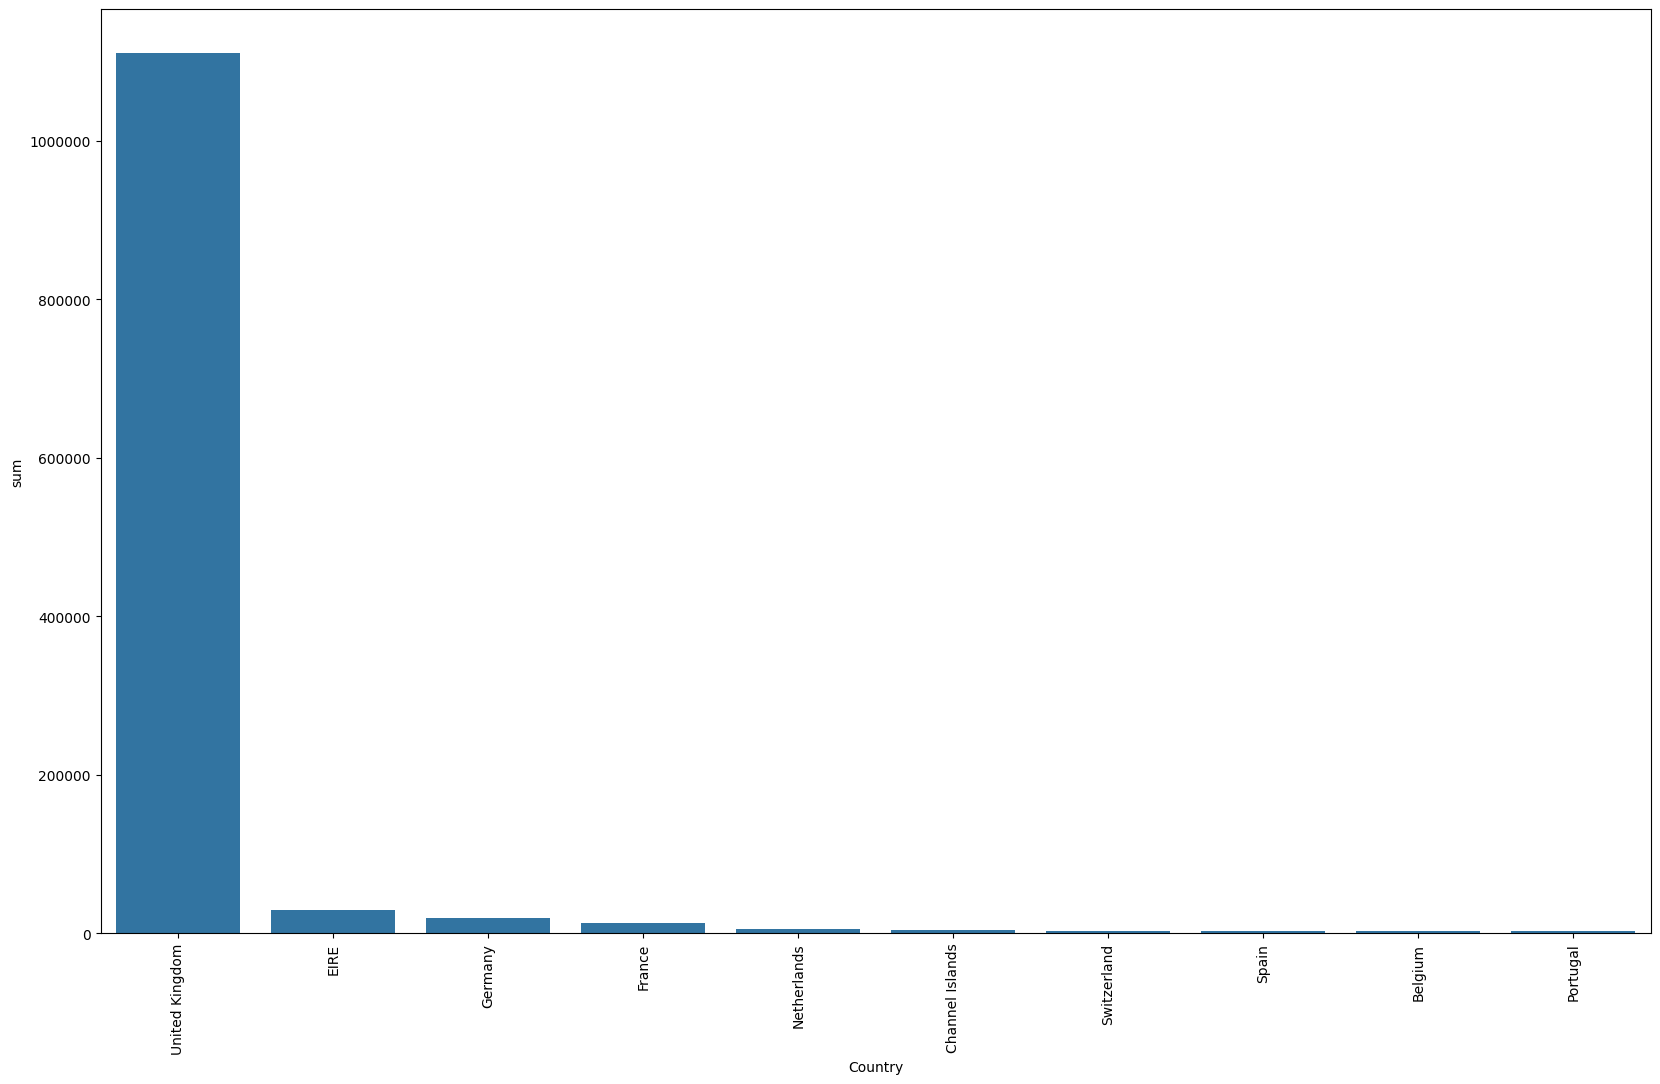

In [91]:
plt.figure(figsize=(20, 12))
sns.barplot(x='Country',y='sum',data= topcountries)
plt.xticks(rotation=90)
# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
# using format string '{:.0f}' here but you can choose others
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.show() 

In [92]:
leastcountries=cleaned_df.groupby('Country')['Price'].agg(['sum']).sort_values(ascending=False,by='sum').tail(10) #least selling country
leastcountries

,sum
Country,
Israel,244.43
Thailand,227.97
Iceland,162.95
RSA,149.46
Canada,147.51
West Indies,122.77
Korea,120.16
Brazil,113.71
Bahrain,91.56


C:\Users\Amr\AppData\Local\Temp\ipykernel_11680\3523609519.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


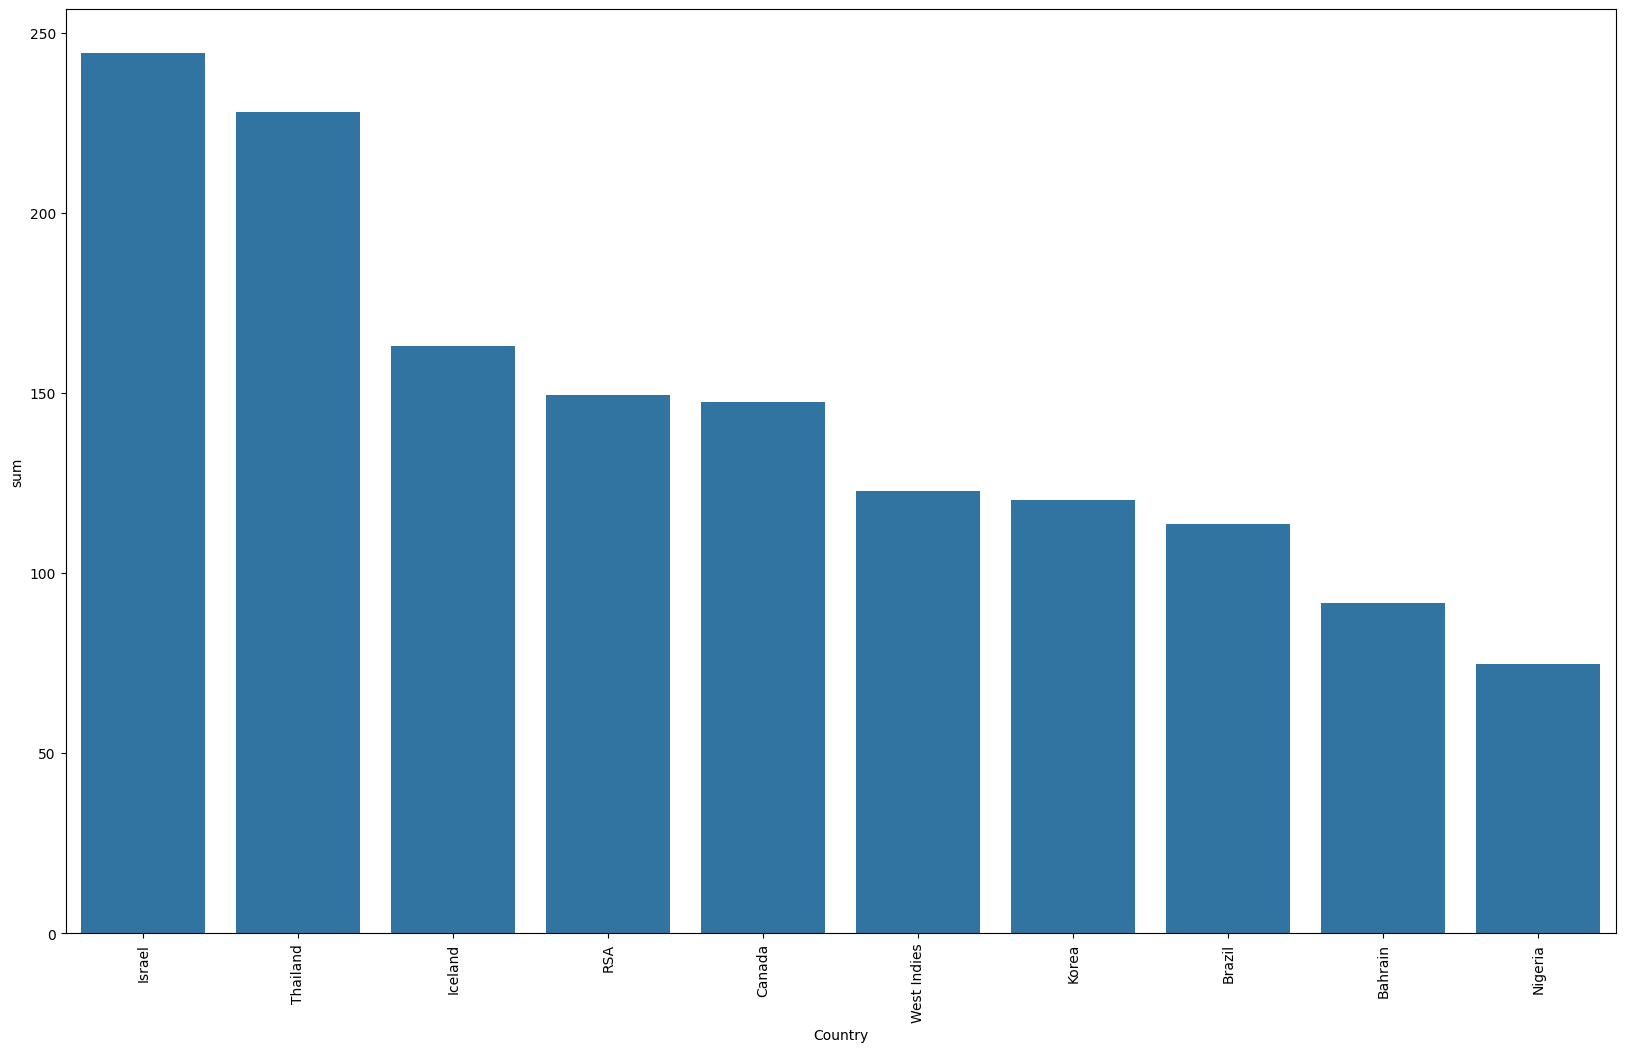

In [93]:
plt.figure(figsize=(20, 12))
sns.barplot(x='Country',y='sum',data= leastcountries)
plt.xticks(rotation=90)
# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
# using format string '{:.0f}' here but you can choose others
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.show() 

In [94]:
top_items=cleaned_df.groupby(['Description'])['Price'].agg('sum').sort_values(ascending=False).reset_index().head(10) #top 10 best selling item
top_items

,Description,Price
0,REGENCY CAKESTAND 3 TIER,21207.65
1,WHITE HANGING HEART T-LIGHT HOLDER,9003.99
2,HOME BUILDING BLOCK WORD,7230.05
3,RED RETROSPOT CAKE STAND,6536.48
4,VINTAGE UNION JACK BUNTING,6423.22
5,LOVE BUILDING BLOCK WORD,5857.80
6,WOOD S/3 CABINET ANT WHITE FINISH,5316.50
7,VINTAGE BLUE KITCHEN CABINET,5015.00
8,TEA TIME CAKE STAND IN GIFT BOX,4980.47
9,SET/4 WHITE RETRO STORAGE CUBES,4888.60


C:\Users\Amr\AppData\Local\Temp\ipykernel_11680\500441105.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


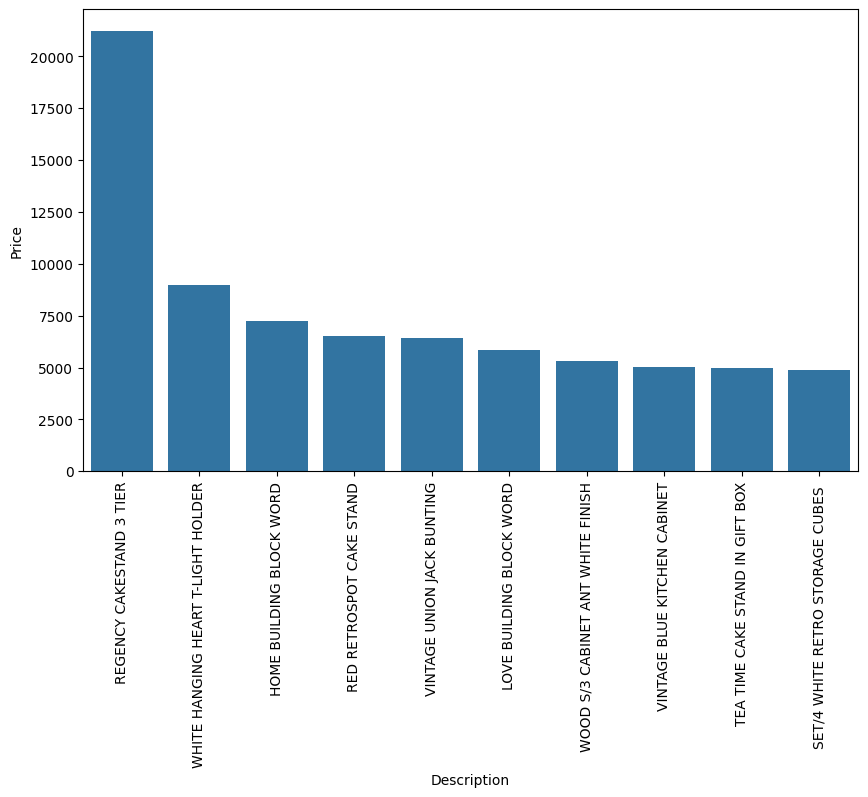

In [95]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Description',y='Price',data= top_items)
plt.xticks(rotation=90)
# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
# using format string '{:.0f}' here but you can choose others
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.show() 

In [96]:
cleaned_df.groupby(['StockCode','Description'])['Price'].sum().sort_values(ascending=False).tail(10) #least selling item

StockCode  Description                       
85230D     VANILLA SCENTED VOTIVE CANDLE                        0.29
85230C     ROSE SCENTED VOTIVE CANDLE                           0.29
16010      FOLDING CAMPING SCISSOR W/KNIF & S                   0.24
16161C     WRAP SPEED DEMONS                                    0.20
84206B     CAT W SUNGLASSES BLANK CARD                          0.19
35751D     PINK CURRENT CANDLE RING                             0.19
84250M     GREETING CARD, BLACKPOOL ROCK                        0.19
84205C     HAPPY BIRTHDAY GINGER CAT CARD                       0.19
37471      MULTICOLOUR POLKADOT PLATE                           0.10
17061      ASSORTED SHAPED STENCIL FOR HENNA                    0.04
Name: Price, dtype: float64

In [97]:
cleaned_df.groupby(['StockCode','Description'])['Quantity'].sum().sort_values(ascending=False).head(10) #top 10 best selling item in units

StockCode  Description                       
85123A     WHITE HANGING HEART T-LIGHT HOLDER    56915
84077      WORLD WAR 2 GLIDERS ASSTD DESIGNS     54754
17003      BROCADE RING PURSE                    48166
21212      PACK OF 72 RETRO SPOT CAKE CASES      45156
84879      ASSORTED COLOUR BIRD ORNAMENT         44551
84991      60 TEATIME FAIRY CAKE CASES           35806
21977      PACK OF 60 PINK PAISLEY CAKE CASES    31006
85099B     JUMBO BAG RED RETROSPOT               29578
22197      SMALL POPCORN HOLDER                  25718
37410      BLACK AND WHITE PAISLEY FLOWER MUG    25685
Name: Quantity, dtype: int64

In [98]:
cleaned_df.groupby(['StockCode','Description'])['Quantity'].sum().sort_values(ascending=False).tail(10) #least selling item in units

StockCode  Description                     
35638A     PINK AND BLACK STRING CURTAIN       1
37451      CERAMIC CAKE TEAPOT WITH CHERRY     1
22659      LUNCHBOX I LOVE LONDON              1
22631      CIRCUS PARADE LUNCHBOX              1
79301      FEATHER HEART LIGHTS                1
85232C     RUSSIAN FOLKART STACKING TINS       1
22876      NUMBER TILE COTTAGE GARDEN 8        1
90183C     BLACK DROP EARRINGS W LONG BEADS    1
90188      DROP EARRINGS W FLOWER & LEAF       1
84648      NEW BAROQUE WALL MIRROR             1
Name: Quantity, dtype: int64

In [99]:
cleaned_df.groupby(['Customer ID'])['Price'].agg(['sum','count']).sort_values(ascending=False,by='sum').head(10) #top 10 customers


,sum,count
Customer ID,,
14911.00,19798.66,5485
17841.00,15211.45,5041
14606.00,10831.26,3857
14156.00,8978.13,2617
14527.00,8786.81,1726
17850.00,7655.89,2499
12748.00,6384.19,2613
15768.00,6275.45,1211
15311.00,5898.44,2052


In [100]:
cleaned_df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract Year-Month for grouping
cleaned_df['YearMonth'] = cleaned_df['InvoiceDate'].dt.to_period('M')
sales_time=cleaned_df.groupby(['YearMonth'])['Price'].agg(['sum']).sort_values(ascending=False,by='sum').reset_index() #time sales analysis
sales_time

C:\Users\Amr\AppData\Local\Temp\ipykernel_11680\3917487471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
C:\Users\Amr\AppData\Local\Temp\ipykernel_11680\3917487471.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['YearMonth'] = cleaned_df['InvoiceDate'].dt.to_period('M')


,YearMonth,sum
0,2010-11,177487.08
1,2010-10,144149.11
2,2010-03,96459.33
3,2010-09,95948.28
4,2010-06,95760.23
5,2009-12,94486.10
6,2010-05,88620.28
7,2010-07,83840.67
8,2010-04,83455.70
9,2010-08,76553.13


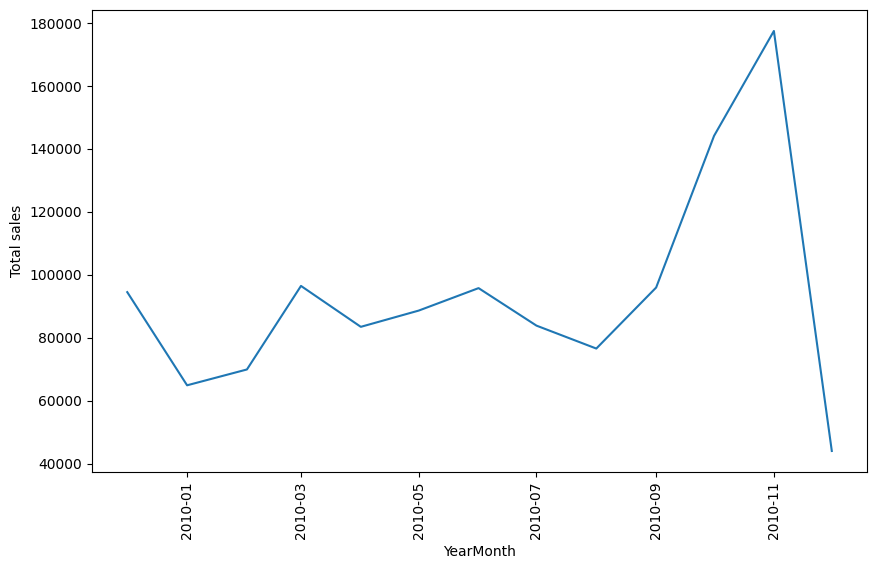

In [101]:
plt.figure(figsize=(10,6))
sns.lineplot(data=sales_time,x=sales_time['YearMonth'].astype('datetime64[ns]'),y='sum')
plt.xticks(rotation=90)
plt.ylabel('Total sales')
plt.show()

In [102]:
cleaned_df.groupby(['Customer ID'])['Price'].sum().sort_values(ascending=False).tail(10) #least buying cutomers

Customer ID
13105.00                   0.72
17805.00                   0.64
15775.00                   0.57
13217.00                   0.53
16605.00                   0.42
13906.00                   0.42
13942.00                   0.32
14900.00                   0.29
14845.00                   0.25
14033.00                   0.19
Name: Price, dtype: float64

Customers Segmentation

In [103]:
cleaned_df['totallinesales']=cleaned_df['Price'] * cleaned_df['Quantity']
cleaned_df

C:\Users\Amr\AppData\Local\Temp\ipykernel_11680\1141016108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['totallinesales']=cleaned_df['Price'] * cleaned_df['Quantity']


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,YearMonth,totallinesales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,2009-12,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,2009-12,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,2009-12,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,2009-12,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,2009-12,30.00
...,...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom,2010-12,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,2010-12,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,2010-12,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,2010-12,7.50


In [104]:
aggregated_df=cleaned_df.groupby(by="Customer ID",as_index=False).agg(
MonateryValue=("totallinesales","sum"),
frequency = ("Invoice","nunique") ,
lastInvoiceDate = ("InvoiceDate","max")
)
aggregated_df.head(5)

,Customer ID,MonateryValue,frequency,lastInvoiceDate
0,12346.00,169.36,2,2010-06-28 13:53:00
1,12347.00,1323.32,2,2010-12-07 14:57:00
2,12348.00,221.16,1,2010-09-27 14:59:00
3,12349.00,2221.14,2,2010-10-28 08:23:00
4,12351.00,300.93,1,2010-11-29 15:23:00


In [105]:
max_invoice_date = aggregated_df['lastInvoiceDate'].max()
max_invoice_date

Timestamp('2010-12-09 20:01:00')

In [106]:
aggregated_df["Recency"] = (max_invoice_date - aggregated_df['lastInvoiceDate']).dt.days
aggregated_df.head(5)

,Customer ID,MonateryValue,frequency,lastInvoiceDate,Recency
0,12346.00,169.36,2,2010-06-28 13:53:00,164
1,12347.00,1323.32,2,2010-12-07 14:57:00,2
2,12348.00,221.16,1,2010-09-27 14:59:00,73
3,12349.00,2221.14,2,2010-10-28 08:23:00,42
4,12351.00,300.93,1,2010-11-29 15:23:00,10


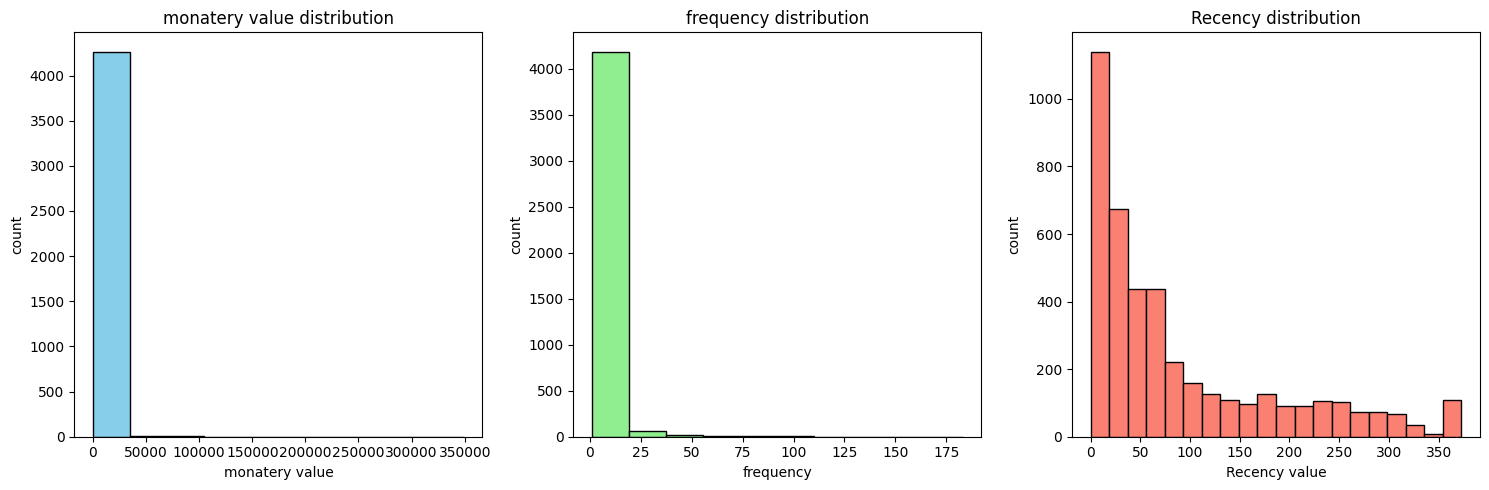

In [107]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(aggregated_df['MonateryValue'],bins=10,color='skyblue',edgecolor='black')
plt.title('monatery value distribution')
plt.xlabel('monatery value')
plt.ylabel('count')

plt.subplot(1,3,2)
plt.hist(aggregated_df['frequency'],bins=10,color='lightgreen',edgecolor='black')
plt.title('frequency distribution')
plt.xlabel('frequency')
plt.ylabel('count')

plt.subplot(1,3,3)
plt.hist(aggregated_df['Recency'],bins=20,color='salmon',edgecolor='black')
plt.title('Recency distribution')
plt.xlabel('Recency value')
plt.ylabel('count')

plt.tight_layout()
plt.show()

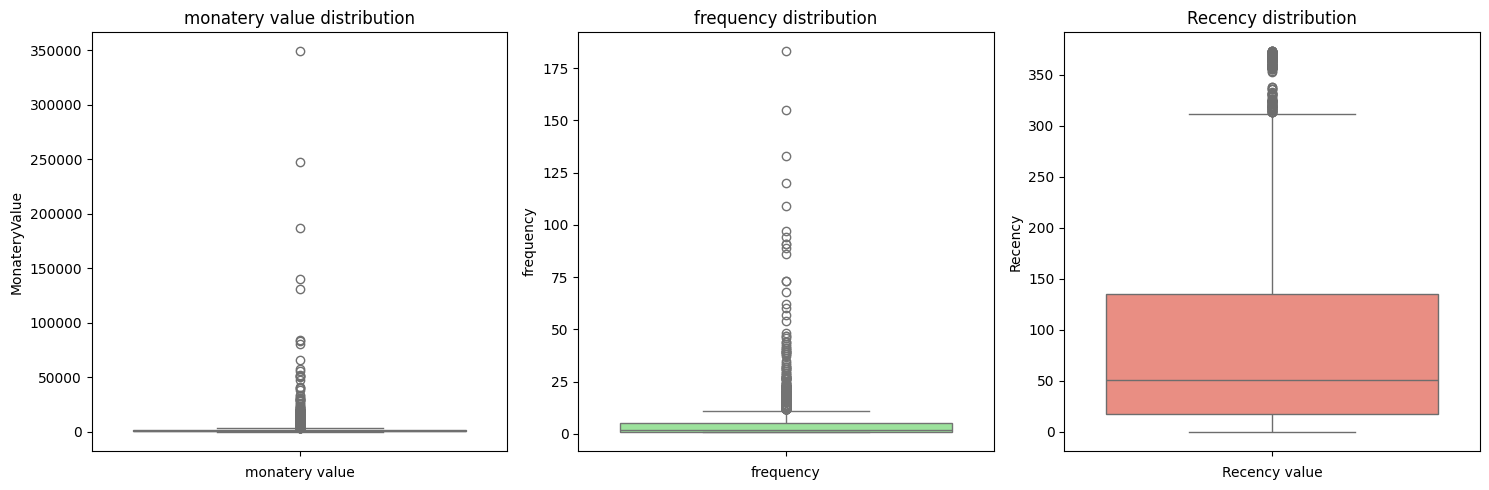

In [108]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(data=aggregated_df['MonateryValue'],color='skyblue')
plt.title('monatery value distribution')
plt.xlabel('monatery value')

plt.subplot(1,3,2)
sns.boxplot(data=aggregated_df['frequency'],color='lightgreen')
plt.title('frequency distribution')
plt.xlabel('frequency')

plt.subplot(1,3,3)
sns.boxplot(data=aggregated_df['Recency'],color='salmon')
plt.title('Recency distribution')
plt.xlabel('Recency value')

plt.tight_layout()
plt.show()

In [109]:
m_q1=aggregated_df["MonateryValue"].quantile(0.25)
m_q3=aggregated_df["MonateryValue"].quantile(0.75)

m_iqr= m_q3-m_q1

monatery_outlier = aggregated_df[(aggregated_df['MonateryValue']>(m_q3 + 1.5 * m_iqr))|(aggregated_df['MonateryValue']<(m_q1 - 1.5 * m_iqr))].copy()

monatery_outlier.describe()

,Customer ID,MonateryValue,frequency,lastInvoiceDate,Recency
count,423.00,423.00,423.00,423,423.00
mean,15103.04,12188.10,17.17,2010-11-09 12:26:02.978723328,30.04
min,12357.00,3802.04,1.00,2009-12-10 18:03:00,0.00
25%,13622.00,4605.94,8.00,2010-11-08 13:17:30,3.00
50%,14961.00,6191.32,12.00,2010-11-26 12:19:00,13.00
75%,16692.00,10273.24,18.00,2010-12-06 10:34:30,31.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,364.00
std,1728.66,25830.85,19.73,NaN,51.54


In [110]:
f_q1=aggregated_df["frequency"].quantile(0.25)
f_q3=aggregated_df["frequency"].quantile(0.75)

f_iqr= f_q3-f_q1

frequency_outlier = aggregated_df[(aggregated_df['frequency']>(f_q3 + 1.5 * f_iqr))|(aggregated_df['frequency']<(f_q1 - 1.5 * f_iqr))].copy()

frequency_outlier.describe()

,Customer ID,MonateryValue,frequency,lastInvoiceDate,Recency
count,279.00,279.00,279.00,279,279.00
mean,15352.66,14409.71,23.81,2010-11-23 11:06:20.645161216,16.09
min,12437.00,1094.39,12.00,2010-05-12 16:51:00,0.00
25%,13800.00,4331.56,13.00,2010-11-20 13:14:30,2.00
50%,15465.00,6615.77,17.00,2010-12-02 10:46:00,7.00
75%,16828.50,11692.41,23.00,2010-12-07 11:08:30,19.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,211.00
std,1748.43,31381.74,21.93,NaN,26.59


In [111]:
non_outlier_df= aggregated_df[(~aggregated_df.index.isin(monatery_outlier.index)) & (~aggregated_df.index.isin(frequency_outlier.index))]

non_outlier_df.describe()

,Customer ID,MonateryValue,frequency,lastInvoiceDate,Recency
count,3809.00,3809.00,3809.00,3809,3809.00
mean,15376.48,885.50,2.86,2010-09-03 11:16:46.516146176,97.08
min,12346.00,1.55,1.00,2009-12-01 10:49:00,0.00
25%,13912.00,279.91,1.00,2010-07-08 14:48:00,22.00
50%,15389.00,588.05,2.00,2010-10-12 16:25:00,58.00
75%,16854.00,1269.05,4.00,2010-11-17 13:14:00,154.00
max,18287.00,3788.21,11.00,2010-12-09 20:01:00,373.00
std,1693.20,817.67,2.24,NaN,98.11


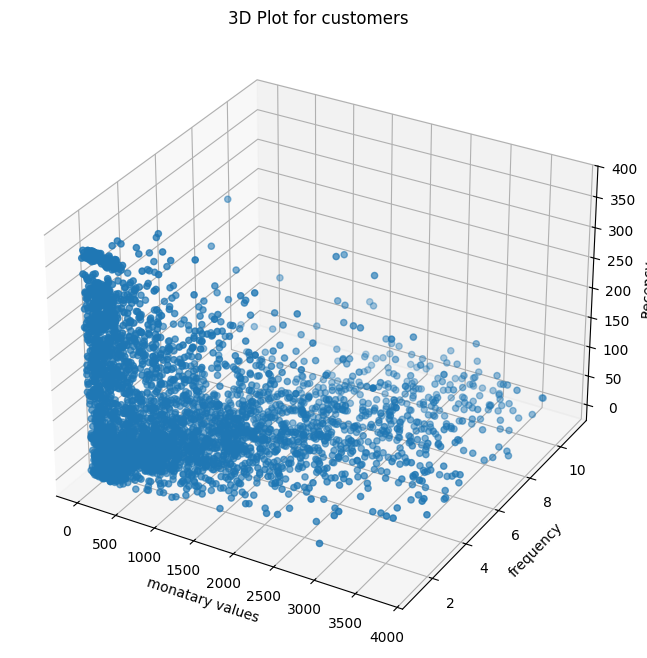

In [112]:
fig =plt.figure(figsize=(8,8))

ax=fig.add_subplot(projection="3d")

scatter = ax.scatter(non_outlier_df['MonateryValue'],non_outlier_df['frequency'],non_outlier_df['Recency'])

ax.set_xlabel('monatary values')
ax.set_ylabel('frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Plot for customers')

plt.show()

In [113]:
scaler = StandardScaler()

scaler_data=scaler.fit_transform(non_outlier_df[["MonateryValue","frequency","Recency"]])

scaler_data

array([[-0.87594534, -0.38488934,  0.68214853],
       [ 0.53551441, -0.38488934, -0.96925093],
       [-0.81258645, -0.83063076, -0.24548944],
       ...,
       [-0.62197163, -0.83063076,  2.01753946],
       [ 0.44146683, -0.38488934,  0.14187587],
       [ 1.72488782,  0.50659348, -0.81634357]])

In [114]:
scaler_data_df=pd.DataFrame(scaler_data,index=non_outlier_df.index,columns=("MonateryValue","frequency","Recency"))
scaler_data_df

,MonateryValue,frequency,Recency
0,-0.88,-0.38,0.68
1,0.54,-0.38,-0.97
2,-0.81,-0.83,-0.25
3,1.63,-0.38,-0.56
4,-0.72,-0.83,-0.89
...,...,...,...
4280,-0.30,1.40,-0.82
4281,-0.58,-0.83,-0.32
4282,-0.62,-0.83,2.02
4283,0.44,-0.38,0.14


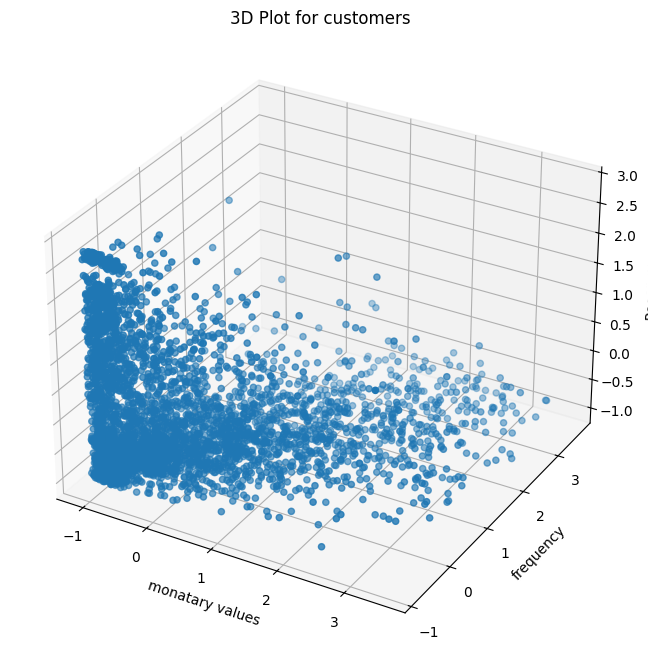

In [115]:
fig =plt.figure(figsize=(8,10))

ax=fig.add_subplot(projection="3d")

scatter = ax.scatter(scaler_data_df['MonateryValue'],scaler_data_df['frequency'],scaler_data_df['Recency'])

ax.set_xlabel('monatary values')
ax.set_ylabel('frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Plot for customers')

plt.show()

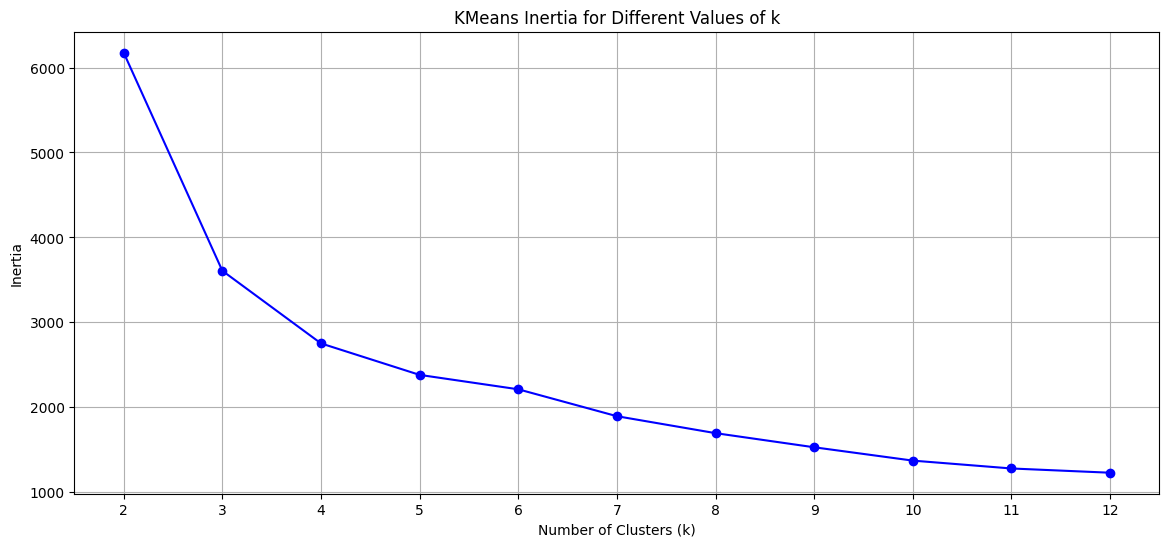

In [116]:
# Initialize parameters
max_k = 12
inertia = []
k_value = range(2, max_k + 1)

# Calculate inertia for each k
for k in k_value:
    kmeans_model = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    kmeans_model.fit_predict(scaler_data_df)
    inertia.append(kmeans_model.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(14, 6))
plt.plot(k_value, inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_value)
plt.title('KMeans Inertia for Different Values of k')
plt.grid(True)
plt.show()

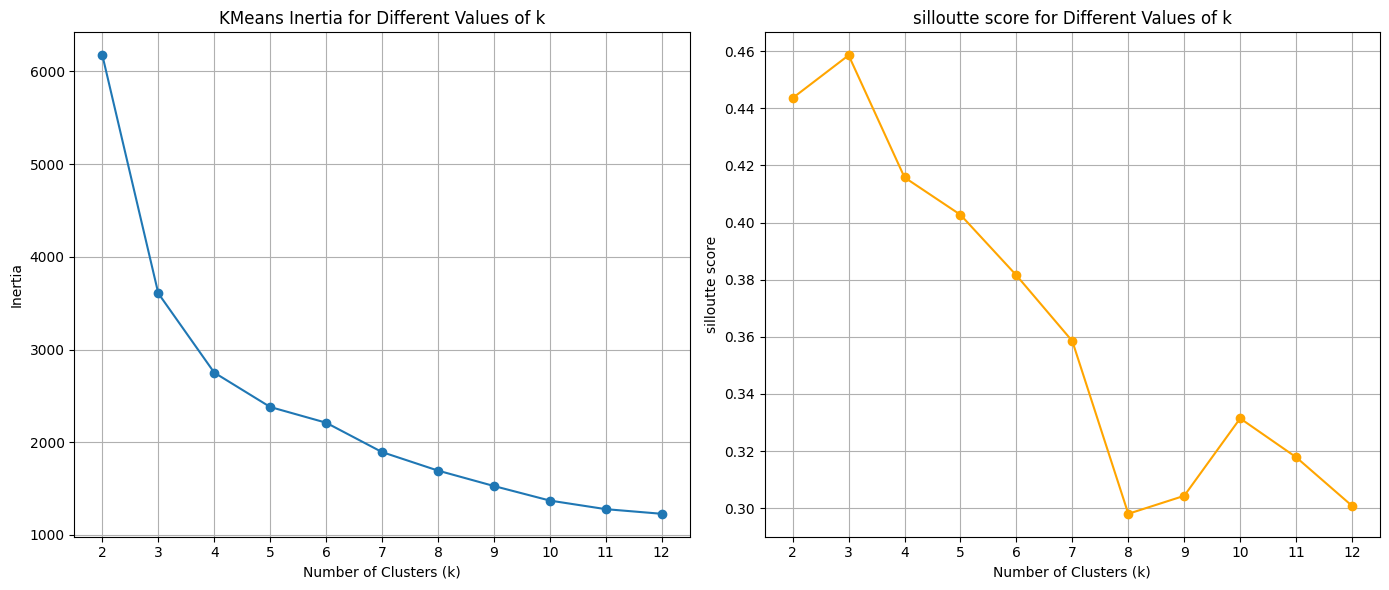

In [117]:
# Initialize parameters
max_k = 12
inertia = []
selloutte_scores=[]
k_value = range(2, max_k + 1)

# Calculate inertia for each k
for k in k_value:
    kmeans_model = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    cluster_labels = kmeans_model.fit_predict(scaler_data_df)
    sil_score =silhouette_score(scaler_data_df,cluster_labels)
    selloutte_scores.append(sil_score)
    inertia.append(kmeans_model.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
plt.plot(k_value, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_value)
plt.title('KMeans Inertia for Different Values of k')
plt.grid(True)


plt.subplot(1,2,2)
plt.plot(k_value, selloutte_scores, marker='o', linestyle='-', color='orange')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('silloutte score')
plt.xticks(k_value)
plt.title('silloutte score for Different Values of k')
plt.grid(True)

plt.tight_layout()
plt.show()

In [118]:
kmeans_model = KMeans(n_clusters=4,random_state=42,max_iter=1000)
cluster_labels=kmeans_model.fit_predict(scaler_data_df)
cluster_labels

array([1, 0, 2, ..., 1, 0, 0], dtype=int32)

C:\Users\Amr\AppData\Local\Temp\ipykernel_11680\2851044366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outlier_df['cluster'] = cluster_labels


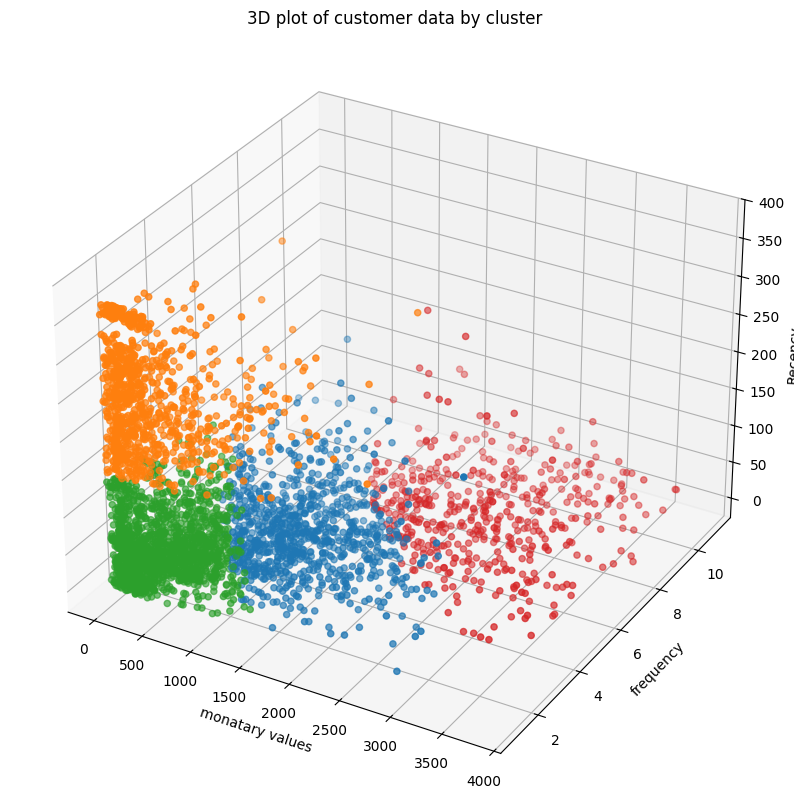

In [119]:
non_outlier_df['cluster'] = cluster_labels

cluster_colors = {0:'#1f77b4',
                  1:'#ff7f0e',
                  2:'#2ca02c',
                  3:'#d62728'}

colors = non_outlier_df['cluster'].map(cluster_colors)

fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outlier_df['MonateryValue'],
                     non_outlier_df['frequency'],
                     non_outlier_df['Recency'],
                     c=colors,
                     marker='o'
)

ax.set_xlabel('monatary values')
ax.set_ylabel('frequency')
ax.set_zlabel('Recency')

ax.set_title('3D plot of customer data by cluster')

plt.show()

In [120]:
non_outlier_df

,Customer ID,MonateryValue,frequency,lastInvoiceDate,Recency,cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4280,18283.00,641.77,6,2010-11-22 15:30:00,17,0
4281,18284.00,411.68,1,2010-10-04 11:33:00,66,2
4282,18285.00,377.00,1,2010-02-17 10:24:00,295,1
4283,18286.00,1246.43,2,2010-08-20 11:57:00,111,0


In [121]:
non_outlier_df['cluster'].value_counts()

cluster
2    1499
0     914
1     902
3     494
Name: count, dtype: int64